In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.diagnostic as smd

In [9]:
# read in data
data = pd.read_csv("candy-data-cleaned.csv")

# define design matrix and dependent variable
X = data.drop(columns=["winpercent","competitorname"],inplace=False)
X = sm.add_constant(X)
y = data["winpercent"]

# fitting logistic regression
logistic_model = sm.Logit(y,X)
res = logistic_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.648224
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             winpercent   No. Observations:                   85
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                 0.06449
Time:                        22:43:44   Log-Likelihood:                -55.099
converged:                       True   LL-Null:                       -58.898
Covariance Type:            nonrobust   LLR p-value:                    0.7489
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6438      0.839     -0.767      0.443      -2.288       1.001
chocolate            0.8105      0.748      1.084      0.278      -0.655       2.276
fruity               0.3984      0.729      0.547      0.585      -1.030       1.826
caramel              0.0995      0.708      0.141      0.888      -1.288       1.487
peanutyalmondy       0.4333      0.707      0.613      0.540      -0.953       1.820
nougat               0.0309      1.099      0.028      0.978      -2.122       2.184
crispedricewafer     0.3842      1.028      0.374      0.708      -1.630       2.398
hard                -0.2553      0.662     -0.386      0.700      -1.552       1.042
bar                  0.0205      0.974      0.021      0.983      -1.889       1.930
pluribus            -0.0330      0.582     -0.057      0.955      -1.174       1.108
sugarpercent         0.3772      0.891      0.423      0.672      -1.370       2.124
pricepercent        -0.2494      1.053     -0.237      0.813      -2.314       1.815
====================================================================================
"""

In [11]:
# fitting linear regression
linear_model = sm.OLS(y,X)
res = linear_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           9.50e-09
Time:                        22:43:58   Log-Likelihood:                 75.804
No. Observations:                  85   AIC:                            -127.6
Df Residuals:                      73   BIC:                            -98.30
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3453      0.043      7.994      0.000       0.259       0.431
chocolate            0.1975      0.039      5.065      0.000       0.120       0.275
fruity               0.0942      0.038      2.504      0.015       0.019       0.169
caramel              0.0222      0.037      0.608      0.545      -0.051       0.095
peanutyalmondy       0.1007      0.036      2.785      0.007       0.029       0.173
nougat               0.0080      0.057      0.141      0.888      -0.106       0.122
crispedricewafer     0.0892      0.053      1.693      0.095      -0.016       0.194
hard                -0.0617      0.035     -1.784      0.079      -0.131       0.007
bar                  0.0044      0.051      0.087      0.931      -0.096       0.105
pluribus            -0.0085      0.030     -0.281      0.779      -0.069       0.052
sugarpercent         0.0909      0.047      1.950      0.055      -0.002       0.184
pricepercent        -0.0593      0.055     -1.075      0.286      -0.169       0.051
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.000
Skew:                          -0.104   Prob(JB):                        0.606
Kurtosis:                       2.511   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

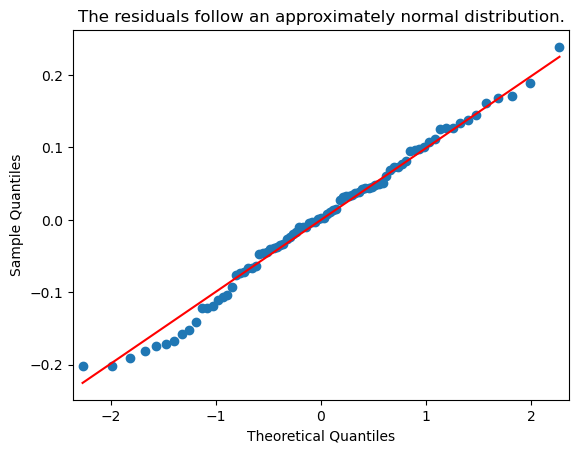

In [26]:
# check assumptions of the linear model
# Q-Q plot of residuals
sm.qqplot(res.resid, line='s')  # 's' for standardized line
plt.title("The residuals follow an approximately normal distribution.")
plt.show()

In [27]:
# Breusch-Pagan test for heteroskedasticity
bp_test = smd.het_breuschpagan(res.resid, res.model.exog)
print(f"The p-value of the BP test is {bp_test[1]*100:.2f}%")

# check standardized residuals (values > 3 or < -3 are potential outliers)
standardized_resid = res.resid_pearson
print(f'Potential outliers: {sum(abs(standardized_resid) > 3)}')

The p-value of the BP test is 20.57%
Potential outliers: 0
